In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tempfile

# Basic functionality on a graph

After importing a Raphtory graph we can create a blank one to work with:

* Graphs in Raphtory are directed by default


In [3]:
from raphtory import Graph

g = Graph()
g

Graph(number_of_nodes=0, number_of_edges=0, number_of_temporal_edges=0, earliest_time=None, latest_time=None)

In [4]:
g.add_edge(0, "1", "2")
g.add_edge(0, "1", "3", layer="layer1")
g.add_edge(0, "1", "4", layer="layer2")

g.nodes.edges.layer_names

NestedArcStringVecIterable([[[_default], [layer1], [layer2]], [[_default]], [[layer1]], [[layer2]]])

Once we have a new graph we can add nodes and edges to it via `add_node()` and `add_edge()`. For these:
* The ids of nodes and the source/destination of an edge can be either strings or integers
* All additions into the graph must happen at a specific time - this means updates are also additions
* If you add an edge between nodes which do no exist in the graph yet, these will be automatically created
* Properties can be added onto nodes and edges - this is a dict of any value, but the keys must be strings
* We have a special type of `static property` which exists outside of the timeline and is always accessible. 
* Additions can be completed out of order, making it very easy to merge datasets together


We can then check the state of the graph:
* To see if a node or edge exists you can use `has_node()` and `has_edge()`
* To get the earliest and latest times at which updates have been applied to the graph you can use `earliest_time()` and `latest_time()` - if no updates have been applied these will return `None`
* To get the total number of nodes and edges of a graph you can use `num_edges()` and `num_nodes()`.

In [12]:
# Basic Addition of Nodes and Edges
g.add_node(timestamp=1, id="10")
g.add_edge(timestamp=2, src="1", dst="2")

# checking node 10, 1 and 5 exist
print(g.has_node("10"), g.has_node("1"), g.has_node("5"))
# checking edge 1,2 exists and 2,1 doesn't as Raphtory is directed
print(g.has_edge("1", "2"), g.has_edge("2", "1"))
# Check the total number of edges and nodes
print(g.count_edges(), g.count_nodes())

# Adding nodes and edges with String IDs
g.add_node(timestamp=5, id="Ben")
g.add_edge(timestamp=8, src="Hamza", dst="Ben", layer="toad")

# Performing the same checks as before, but with strings
print(g.has_node(id="Ben"), g.has_node(id="Hamza"), g.has_node(id="Dave"))
print(g.has_edge(src="Hamza", dst="Ben"), g.has_edge(src="Ben", dst="Hamza"))
print(g.count_edges(), g.count_nodes())

g.add_edge(0, "1", "3", layer="toad")
# Add an edge with Temporal Properties which can change over time
e = g.add_edge(
    timestamp=7,
    src="Haaroon",
    dst="Hamza",
    properties={"property1": 1, "property2": 9.8, "property3": "test"},
    layer="toad",
)
# Add a static property which is immutable
e.add_constant_properties(properties={"First-Met": "01/01/1990"})

# Add an node with Temporal Properties which can change over time
v = g.add_node(
    timestamp=5,
    id="Hamza",
    properties={"property1": 5, "property2": 12.5, "property3": "test2"},
)
# Add a static property which is immutable
v.add_constant_properties(properties={"Date-of-Birth": "01/01/1990"})
print(g.node("Ben").__repr__())
print(g.edge("Haaroon", "Hamza").__repr__())
print(g.__repr__())
with tempfile.NamedTemporaryFile() as g_path:
    g.save_to_file(g_path.name)

    loaded_graph = Graph.load_from_file(g_path.name)

    print(loaded_graph.has_node("Hamza"))

True True False
True False
702 142
True True False
True False
703 144
Node(name=Ben, earliest_time=5, latest_time=8)
Edge(source=Haaroon, target=Hamza, earliest_time=7, latest_time=7, properties={property3: test, property1: 1, property2: 9.8, First-Met: {ArcStr("toad"): Str(ArcStr("01/01/1990"))}})
Graph(number_of_nodes=146, number_of_edges=705, number_of_temporal_edges=2653, earliest_time=0, latest_time=32674)
True


In [5]:
list(g.edges.layer_names)

[['_default'], ['layer1'], ['layer2']]

In [6]:
g.nodes.edges.start

In [7]:
from raphtory import graph_loader

g = graph_loader.lotr_graph()
view = g.at(300)
g.add_node(timestamp=0, id="Gandalf", properties={"Race": "Maiar"})

# view["Gandalf"]["Race"]

g.to_networkx()

/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='degree', ylabel='Count'>

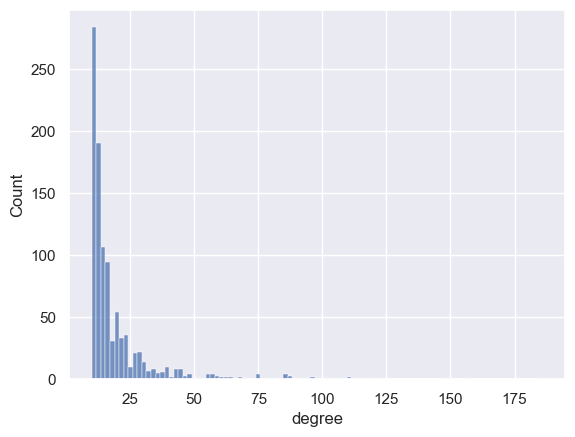

In [8]:
from raphtory import graph_gen

g = Graph()
graph_gen.ba_preferential_attachment(g, nodes_to_add=1000, edges_per_step=10)
view = g.window(0, 1000)

ids = []
degrees = []
for v in view.nodes:
    ids.append(v.id)
    degrees.append(v.degree())

df = pd.DataFrame.from_dict({"id": ids, "degree": degrees})

sns.set()
sns.histplot(df.degree)

In [9]:
from raphtory import Graph
from raphtory import algorithms
from raphtory import graph_loader

g = graph_loader.lotr_graph()
views_l1 = g.rolling(1000)

/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

<Axes: xlabel='Time', ylabel='Average Interactions'>

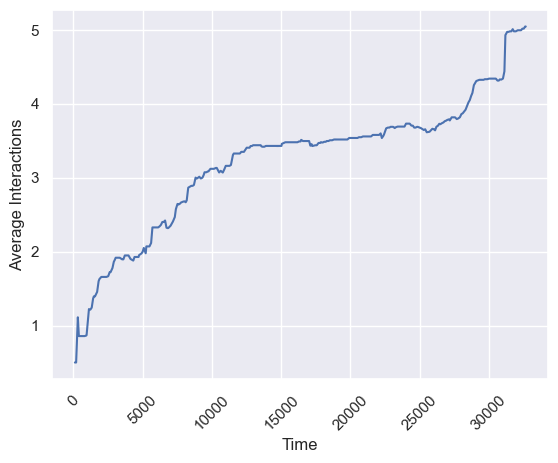

In [10]:
views = g.expanding(100)

timestamps = []
node_count = []
edge_count = []
degree = []

for view in views:
    timestamps.append(view.latest_time)
    # node_count.append(view.num_nodes())
    # edge_count.append(view.num_edges())
    degree.append(view.count_edges() / max(1, view.count_nodes()))

sns.set_context()
ax = plt.gca()
plt.xticks(rotation=45)
ax.set_xlabel("Time")
ax.set_ylabel("Average Interactions")
sns.lineplot(x=timestamps, y=degree, ax=ax)

/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shivamkapoor/opt/miniconda3/envs/pyraphtory/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

<Axes: xlabel='Time', ylabel='Interactions'>

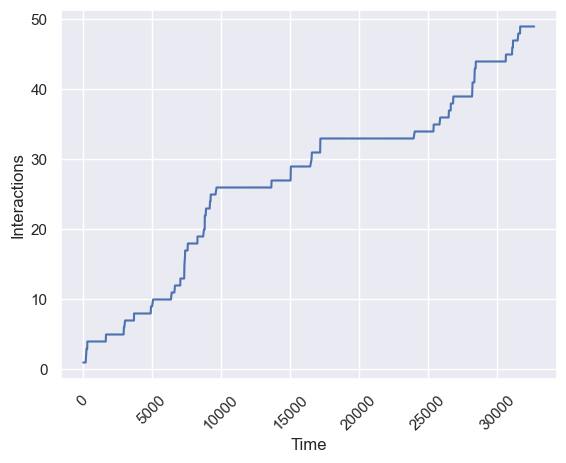

In [11]:
views = g.expanding(step=10)

timestamps = []
degree = []

for view in views:
    timestamps.append(view.latest_time)
    gandalf = view.node("Gandalf")
    if gandalf is not None:
        degree.append(gandalf.degree())
    else:
        degree.append(0)


sns.set_context()
ax = plt.gca()
plt.xticks(rotation=45)
ax.set_xlabel("Time")
ax.set_ylabel("Interactions")
sns.lineplot(x=timestamps, y=degree, ax=ax)